# Welcome !
In this notebook, we will build a model to predict handwritten digit images from the famous `mnist` dataset using `tensorflow` library.

# 1. Data Processing

### 1.1 Import important libraries

In [1]:
# ML
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Manipulation
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### 1.3 Normalize Dataset

In [3]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

### 1.4 Explore Dataset

In [4]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


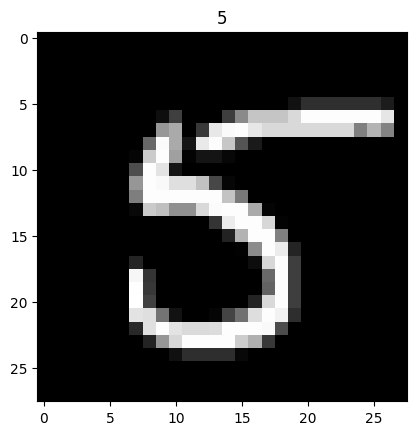

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

# 2. Model Structure and Training

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]), # 28,28
    tf.keras.layers.Flatten(), # 784
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 17s 10ms/step - loss: 0.2709 - accuracy: 0.9209 - val_loss: 0.1556 - val_accuracy: 0.9541
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1166 - accuracy: 0.9640 - val_loss: 0.1089 - val_accuracy: 0.9680
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.1107 - val_accuracy: 0.9675
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0876 - val_accuracy: 0.9736
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.1052 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0957 - val_accuracy: 0.9738
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.1028 - val_accurac

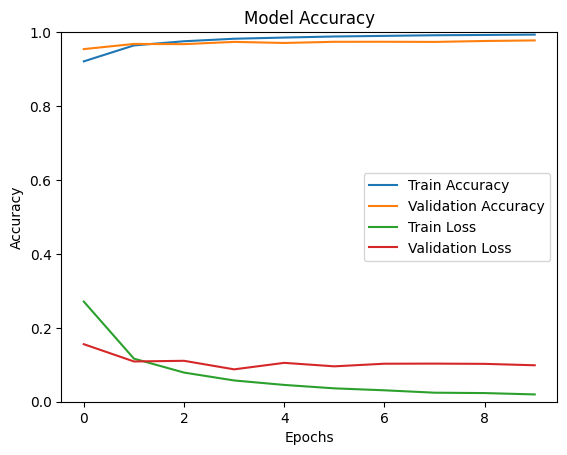

In [8]:
# plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], loc='center right')
plt.show()

# 3. Model Evaluation and Prediction

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9744


[0.09928357601165771, 0.974399983882904]

In [10]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(f'Model Accuracy on Test : {round(accuracy_score(y_test, y_pred)*100, 2)}%')

313/313 [==============================] - 1s 2ms/step
Model Accuracy on Test : 97.44%


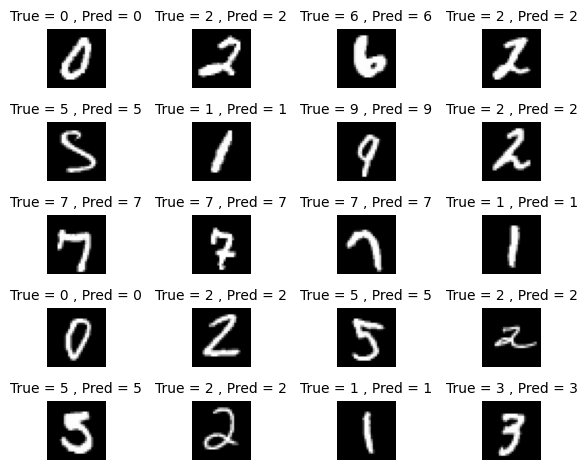

In [11]:
for i in range(20) :
  random_img = np.random.randint(0, X_test.shape[0])
  plt.subplot(5,4,i+1)
  plt.imshow(X_test[random_img].reshape(28,28), cmap='gray')
  plt.title(f'True = {y_test[random_img]} , Pred = {y_pred[random_img]}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 970,    0,    0,    1,    0,    1,    5,    1,    2,    0],
       [   3, 1121,    1,    1,    0,    0,    2,    0,    7,    0],
       [   4,    0, 1008,    7,    0,    0,    3,    4,    5,    1],
       [   0,    0,    4,  996,    0,    2,    0,    4,    1,    3],
       [   3,    0,    4,    0,  955,    0,    4,    1,    0,   15],
       [   1,    1,    1,   16,    2,  863,    5,    2,    0,    1],
       [   1,    2,    1,    1,    2,    5,  945,    0,    1,    0],
       [   1,    4,   18,    9,    1,    0,    0,  982,    2,   11],
       [   5,    1,   10,   17,    4,    4,    2,    3,  923,    5],
       [   3,    3,    0,    5,    9,    2,    0,    2,    4,  981]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

